This notebook presents an analogous selection of results from the paper [The Distribution of Wealth and the Marginal Propensity to Consume](http://econ.jhu.edu/people/ccarroll/papers/cstwMPC), using the [Econ-ARK/HARK](https://github.com/econ-ark/HARK) toolkit. In this version of the model, the results are presented for the estimation procedure with the **rate of return** as the key parameter of interest. 

In [1]:
# This cell does some standard python setup!

import code.calibration as parameters
import warnings  # The warnings package allows us to ignore some harmless but alarming warning messages
from code.calibration import SCF_wealth, SCF_weights
from code.estimation import estimate

# Import related generic python packages
import matplotlib.pyplot as plt  # Plotting tools
import numpy as np
from HARK.utilities import get_lorenz_shares

warnings.filterwarnings("ignore")


def mystr(number):
    return f"{number:.4f}"

## Perpetual Youth Model Without Return Preference Heterogeneity

In [2]:
"""
This will run the absolute minimum amount of work that actually produces
relevant output-- no aggregate shocks, perpetual youth, matching net worth.
Will run both beta-point and beta-dist versions.
"""

"""
Copied here from do_min.py.
Design decisions about whether to include this code explicitly,
or import it, or execute it as is here, TBD.
"""

'\nCopied here from do_min.py.\nDesign decisions about whether to include this code explicitly,\nor import it, or execute it as is here, TBD.\n'

In [3]:
# For speed here, use the "tractable" version of the model
# This is not the "right" model, but illustrates the key point
"""
This options file specifies parameter heterogeneity, making the choice in the paper:
uniformly distributed discount factors.
"""
param_name = "Rfree"  # Which parameter to introduce heterogeneity in
dist_type = "lognormal"  # Which type of distribution to use

"""
This options file specifies the "standard" work options for cstwMPC, estimating the model only.
"""
run_estimation = True  # Runs the estimation if True
# Choose which sensitivity analyses to run: rho, xi_sigma, psi_sigma, mu, urate, mortality, g, R
run_sensitivity = [False, False, False, False, False, False, False, False]
# Computes K/Y ratio for a wide range of beta; should have do_beta_dist = False
find_beta_vs_KY = False
# Uses a "tractable consumer" rather than solving full model when True
do_tractable = False

# Solve for the $\beta-Point$ (do_param_dist=False) for speed
"""
This options file establishes the second simplest model specification possible:
with heterogeneity, no aggregate shocks, perpetual youth model, matching net worth.
"""

do_param_dist = False  # Do param-dist version if True, param-point if False
do_lifecycle = False  # Use lifecycle model if True, perpetual youth if False
do_agg_shocks = False  # Solve the FBS aggregate shocks version of the model
# Matches liquid assets data when True, net worth data when False
do_liquid = False

Beginning an estimation with the specification name PYLognrmrratePointIndNetWorth...
get_KY_ratio_difference tried center = 0.99 and got -2.7034829435849956
get_KY_ratio_difference tried center = 1.05 and got 9.682631223753747
get_KY_ratio_difference tried center = 1.003096034351341 and got -2.3050731831324125
get_KY_ratio_difference tried center = 1.0320663615735066 and got 4.32685811777595
get_KY_ratio_difference tried center = 1.0131653069894997 and got -1.080938179498667
get_KY_ratio_difference tried center = 1.0192121533547296 and got 1.2179854786910869
get_KY_ratio_difference tried center = 1.016008492790148 and got 0.262256423371773
get_KY_ratio_difference tried center = 1.0154533656794034 and got 0.04099610241161722
get_KY_ratio_difference tried center = 1.0153549340964154 and got -0.0011974103891860821
get_KY_ratio_difference tried center = 1.0153577274879173 and got 1.2956280443621182e-05
get_KY_ratio_difference tried center = 1.0153572274879168 and got -0.0002036346632836583

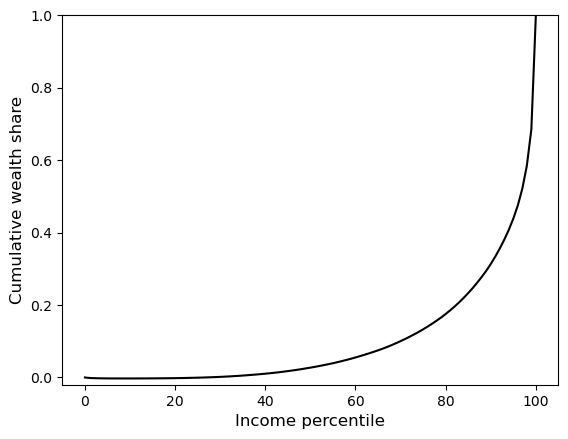

Estimate is center=1.0153577274879173, spread=0.0
Lorenz distance is 42.484959447994584
Average MPC for all consumers is 0.095
Average MPC in the top percentile of W/Y is 0.065
Average MPC in the top decile of W/Y is 0.068
Average MPC in the top quintile of W/Y is 0.069
Average MPC in the second quintile of W/Y is 0.071
Average MPC in the middle quintile of W/Y is 0.071
Average MPC in the fourth quintile of W/Y is 0.073
Average MPC in the bottom quintile of W/Y is 0.193
Average MPC in the top percentile of y is 0.072
Average MPC in the top decile of y is 0.074
Average MPC in the top quintile of y is 0.081
Average MPC in the second quintile of y is 0.113
Average MPC in the middle quintile of y is 0.115
Average MPC in the fourth quintile of y is 0.079
Average MPC in the bottom quintile of y is 0.089
Average MPC for the employed is 0.093
Average MPC for the unemployed is 0.127
Average MPC for the retired is nan
Of the population with the 1/3 highest MPCs...
62.802% are in the bottom wealt

In [4]:
options = {
    "param_name": param_name,
    "dist_type": dist_type,
    "run_estimation": run_estimation,
    "run_sensitivity": run_sensitivity,
    "find_beta_vs_KY": find_beta_vs_KY,
    "do_tractable": do_tractable,
    "do_param_dist": do_param_dist,
    "do_lifecycle": do_lifecycle,
    "do_agg_shocks": do_agg_shocks,
    "do_liquid": do_liquid,
}


EstimationEconomy = estimate(options, parameters)

In [5]:
MyGuys = EstimationEconomy.agents[0]
MyGuys.check_conditions()
print(MyGuys.bilt["conditions_report"])

print(MyGuys.Rfree)

β=0.99000 : intertemporal discount factor (DiscFac)
R=1.01536 : risk free interest factor (Rfree)
G=1.00000 : permanent income growth factor (PermGroFac)
ρ=1.01000 : coefficient of relative risk aversion (CRRA)
ℒ=0.99375 : survival probability (LivPrb)
Þ=(βℒR)^(1/ρ)=0.99893 : absolute patience factor (APFac)
℘=0.01400 : probability of worst income shock realization (WorstPrb)

APFac=0.99893 : The Absolute Patience Factor satisfies the Absolute Impatience Condition (AIC) Þ < 1.
RPFac=0.98382 : The Return Patience Factor satisfies the Return Impatience Condition (RIC) Þ/R < 1.
WRPFac=0.01437 : The Weak Return Patience Factor satisfies the Weak Return Impatience Condition (WRIC) ℘ Þ/R < 1.
GPFacRaw=0.99893 : The Growth Patience Factor satisfies the Growth Impatience Condition (GICRaw) Þ/G < 1.
GPFacMod=1.00220 : The Risk-Modified Growth Patience Factor violates the Risk-Modified Growth Impatience Condition (GICMod) Þ/(G‖Ψ‖_(-1)) < 1.
GPFacLiv=0.99269 : The Mortality-Adjusted Growth Patien

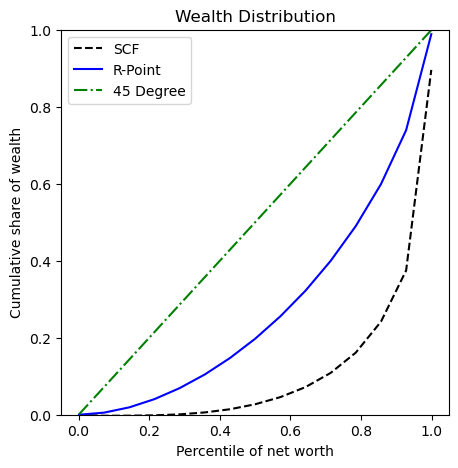

In [6]:
# Construct the Lorenz curves and plot them

pctiles = np.linspace(0.001, 0.999, 15)
SCF_Lorenz_points = get_lorenz_shares(
    SCF_wealth, weights=SCF_weights, percentiles=pctiles
)

sim_wealth = EstimationEconomy.reap_state["aLvl"][0]
sim_Lorenz_points = get_lorenz_shares(sim_wealth, percentiles=pctiles)

# Plot
plt.figure(figsize=(5, 5))
plt.title("Wealth Distribution")
plt.plot(pctiles, SCF_Lorenz_points, "--k", label="SCF")
plt.plot(pctiles, sim_Lorenz_points, "-b", label="R-Point")
plt.plot(pctiles, pctiles, "g-.", label="45 Degree")
plt.xlabel("Percentile of net worth")
plt.ylabel("Cumulative share of wealth")
plt.legend(loc=2)
plt.ylim([0, 1])
plt.show("wealth_distribution_1")

## Perpetual Youth Model with Return Preference Heterogeneneity


In [7]:
"""
This options file establishes the second simplest model specification possible:
with heterogeneity, no aggregate shocks, perpetual youth model, matching net worth.
"""
do_param_dist = True  # Do param-dist version if True, param-point if False
do_lifecycle = False  # Use lifecycle model if True, perpetual youth if False
do_agg_shocks = False  # Solve the FBS aggregate shocks version of the model
do_liquid = False  # Matches liquid assets data when True, net worth data when False
do_tractable = False  #

Beginning an estimation with the specification name PYLognrmrrateDistIndNetWorth...
get_KY_ratio_difference tried center = 0.99 and got -2.6569920832813194
get_KY_ratio_difference tried center = 1.05 and got 12.416548965654135
get_KY_ratio_difference tried center = 1.0005761164201121 and got -1.9804861096776143
get_KY_ratio_difference tried center = 1.019612501199433 and got 2.912975855576217
get_KY_ratio_difference tried center = 1.0082805383409572 and got 0.039375688078266524
get_KY_ratio_difference tried center = 1.0081303464245026 and got 0.001201883422198069
get_KY_ratio_difference tried center = 1.008125620664231 and got -2.6920611739811307e-07
get_KY_ratio_difference tried center = 1.0081261206642316 and got 0.00012692455900520372
find_lorenz_distance_at_target_KY tried spread = 0.008257354213751997 and got 6.661953155585708
get_KY_ratio_difference tried center = 0.99 and got -2.533494639550711
get_KY_ratio_difference tried center = 1.05 and got 14.830824819196502
get_KY_ratio_d

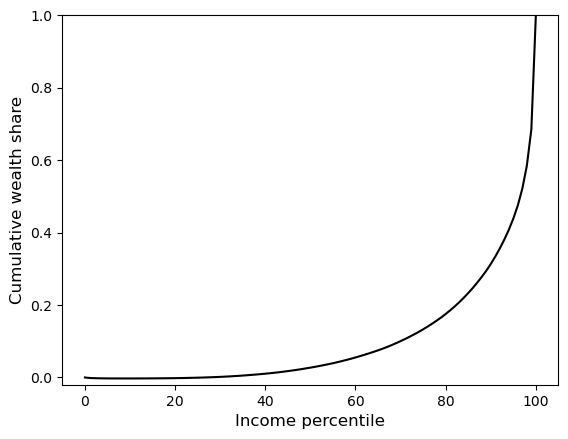

Estimate is center=1.0114253039811014, spread=0.005746723106731889
Lorenz distance is 2.5892560123637365
Average MPC for all consumers is 0.241
Average MPC in the top percentile of W/Y is 0.063
Average MPC in the top decile of W/Y is 0.065
Average MPC in the top quintile of W/Y is 0.068
Average MPC in the second quintile of W/Y is 0.090
Average MPC in the middle quintile of W/Y is 0.191
Average MPC in the fourth quintile of W/Y is 0.308
Average MPC in the bottom quintile of W/Y is 0.550
Average MPC in the top percentile of y is 0.222
Average MPC in the top decile of y is 0.215
Average MPC in the top quintile of y is 0.219
Average MPC in the second quintile of y is 0.249
Average MPC in the middle quintile of y is 0.252
Average MPC in the fourth quintile of y is 0.221
Average MPC in the bottom quintile of y is 0.266
Average MPC for the employed is 0.231
Average MPC for the unemployed is 0.381
Average MPC for the retired is nan
Of the population with the 1/3 highest MPCs...
51.563% are in

In [8]:
options = {
    "param_name": param_name,
    "dist_type": dist_type,
    "run_estimation": run_estimation,
    "run_sensitivity": run_sensitivity,
    "find_beta_vs_KY": find_beta_vs_KY,
    "do_tractable": do_tractable,
    "do_param_dist": do_param_dist,
    "do_lifecycle": do_lifecycle,
    "do_agg_shocks": do_agg_shocks,
    "do_liquid": do_liquid,
    "do_combo_estimation": False,
}


EstimationEconomy = estimate(options, parameters)

In [9]:
MyGuys_First = EstimationEconomy.agents[0]
MyGuys_First.check_conditions()
print(MyGuys_First.bilt["conditions_report"])

β=0.99000 : intertemporal discount factor (DiscFac)
R=1.00227 : risk free interest factor (Rfree)
G=1.00000 : permanent income growth factor (PermGroFac)
ρ=1.01000 : coefficient of relative risk aversion (CRRA)
ℒ=0.99375 : survival probability (LivPrb)
Þ=(βℒR)^(1/ρ)=0.98619 : absolute patience factor (APFac)
℘=0.01400 : probability of worst income shock realization (WorstPrb)

APFac=0.98619 : The Absolute Patience Factor satisfies the Absolute Impatience Condition (AIC) Þ < 1.
RPFac=0.98395 : The Return Patience Factor satisfies the Return Impatience Condition (RIC) Þ/R < 1.
WRPFac=0.01437 : The Weak Return Patience Factor satisfies the Weak Return Impatience Condition (WRIC) ℘ Þ/R < 1.
GPFacRaw=0.98619 : The Growth Patience Factor satisfies the Growth Impatience Condition (GICRaw) Þ/G < 1.
GPFacMod=0.98941 : The Risk-Modified Growth Patience Factor satisfies the Risk-Modified Growth Impatience Condition (GICMod) Þ/(G‖Ψ‖_(-1)) < 1.
GPFacLiv=0.98002 : The Mortality-Adjusted Growth Patie

In [10]:
MyGuys_Last = EstimationEconomy.agents[-1]
MyGuys_Last.check_conditions()
print(MyGuys_Last.bilt["conditions_report"])


β=0.99000 : intertemporal discount factor (DiscFac)
R=1.02063 : risk free interest factor (Rfree)
G=1.00000 : permanent income growth factor (PermGroFac)
ρ=1.01000 : coefficient of relative risk aversion (CRRA)
ℒ=0.99375 : survival probability (LivPrb)
Þ=(βℒR)^(1/ρ)=1.00407 : absolute patience factor (APFac)
℘=0.01400 : probability of worst income shock realization (WorstPrb)

APFac=1.00407 : The Absolute Patience Factor violates the Absolute Impatience Condition (AIC) Þ < 1.
RPFac=0.98377 : The Return Patience Factor satisfies the Return Impatience Condition (RIC) Þ/R < 1.
WRPFac=0.01437 : The Weak Return Patience Factor satisfies the Weak Return Impatience Condition (WRIC) ℘ Þ/R < 1.
GPFacRaw=1.00407 : The Growth Patience Factor violates the Growth Impatience Condition (GICRaw) Þ/G < 1.
GPFacMod=1.00735 : The Risk-Modified Growth Patience Factor violates the Risk-Modified Growth Impatience Condition (GICMod) Þ/(G‖Ψ‖_(-1)) < 1.
GPFacLiv=0.99780 : The Mortality-Adjusted Growth Patience

In [11]:
# Construct the Lorenz curves and plot them

pctiles = np.linspace(0.001, 0.999, 15)
SCF_Lorenz_points = get_lorenz_shares(
    SCF_wealth, weights=SCF_weights, percentiles=pctiles
)

sim_wealth_2 = np.concatenate(EstimationEconomy.reap_state["aLvl"])
sim_Lorenz_points_2 = get_lorenz_shares(sim_wealth_2, percentiles=pctiles)



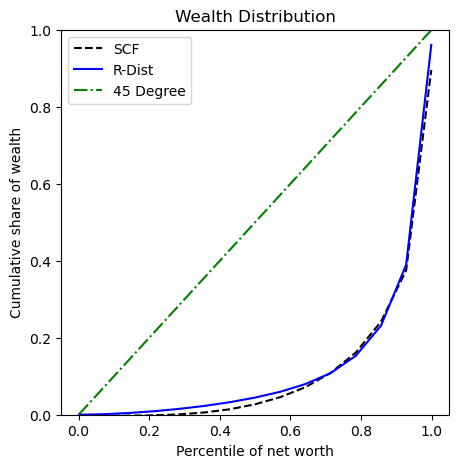

In [12]:
# Plot
plt.figure(figsize=(5, 5))
plt.title("Wealth Distribution")
plt.plot(pctiles, SCF_Lorenz_points, "--k", label="SCF")
plt.plot(pctiles, sim_Lorenz_points_2, "-b", label="R-Dist")
plt.plot(pctiles, pctiles, "g-.", label="45 Degree")
plt.xlabel("Percentile of net worth")
plt.ylabel("Cumulative share of wealth")
plt.legend(loc=2)
plt.ylim([0, 1])
plt.show("wealth_distribution_2")

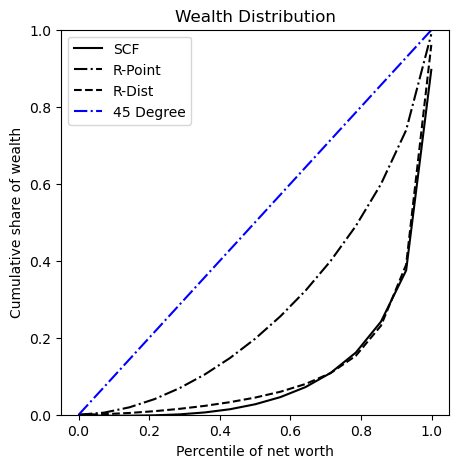

In [13]:
# Plot for the presentation
plt.figure(figsize=(5, 5))
plt.title("Wealth Distribution")
plt.plot(pctiles, SCF_Lorenz_points, "-k", label="SCF")
plt.plot(pctiles, sim_Lorenz_points, "-.k", label="R-Point")
plt.plot(pctiles, sim_Lorenz_points_2, "--k", label="R-Dist")
plt.plot(pctiles, pctiles, "b-.", label="45 Degree")
plt.xlabel("Percentile of net worth")
plt.ylabel("Cumulative share of wealth")
plt.legend(loc=2)
plt.ylim([0, 1])
plt.show("wealth_distribution_2")

## Comparing the Estimation to Data on the Rate of Return

First, we present the graph of the estimated distribution of the rate of return across households which minimizes the Lorenz distance, given the empirical targets for wealth levels from the SCF data.

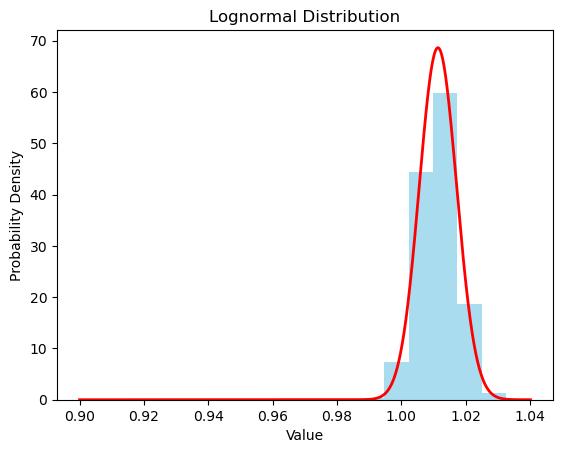

{'Mean': 1.0114253039811014,
 'Standard Deviation': 0.005812429153674286,
 'Skewness': 0.017240501448817308,
 'Kurtosis': -2.9994715776909997}

In [14]:
import re

from code.estimatedlognormalstats import EstLogNormalDist

PYLognrm_RDist = EstLogNormalDist("/Users/dc/Library/CloudStorage/OneDrive-JohnsHopkins/research/GitHub-forks/econ-ark/DistributionOfWealthMPC/DistributionOfWealthMPC/code/results/PYLognrmrrateDistIndNetWorthResults.txt")

#print(PYLognrm_RDist.top)
#print(PYLognrm_RDist.bottom)

PYLognrm_RDist.graph()

PYLognrm_RDist.show_moments()

### Graph of the empirical distribution of safe and risky returns from Fagereng et al. (2015)

<img src="/Users/dc/Library/CloudStorage/OneDrive-JohnsHopkins/research/GitHub-forks/econ-ark/DistributionOfWealthMPC/DistributionOfWealthMPC/DistEmpReturnsFagereng.png" alt="Description of image" width="600" height="500">



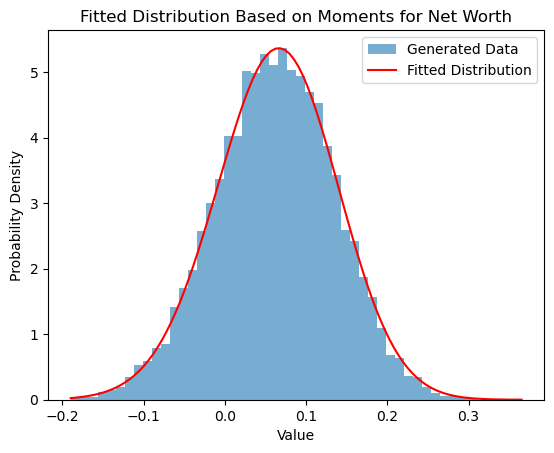

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, skewnorm, kurtosistest

# Given moments
mean = .0379
variance = .0859 ** 2
skewness = -0.79
kurtosis = 47.75

# Moment matching
alpha = skewness
beta = np.sqrt(kurtosis)
loc = mean - (alpha * np.sqrt(variance))
scale = np.sqrt(variance)

# Generate data from the fitted distribution
data = skewnorm.rvs(alpha, loc=loc, scale=scale, size=10000)

# Plotting the histogram and the fitted distribution
plt.hist(data, bins=50, density=True, alpha=0.6, label='Generated Data')
x_vals = np.linspace(min(data), max(data), 100)
plt.plot(x_vals, skewnorm.pdf(x_vals, alpha, loc, scale), 'r', label='Fitted Distribution')
plt.legend()
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Fitted Distribution Based on Moments for Net Worth')
plt.show()